In [ ]:
import platform
print(platform.python_version())

3.7.10


In [ ]:
import keras
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import tqdm
import os
import skimage.io
from PIL import Image
import pickle

In [ ]:
img_data=[]
label_data = []
resize_dim = (75,75)
target = ['adidas','apple','bmw','cocacola','pepsi_symbol'] #,'ferrari','google','fedex','starbucks','shell']

num_to_label = ['HP', 'adidas', 'adidas_text', 'aldi', 'apple', 'becks_symbol', 'becks_text', 'bmw', 'carlsberg_symbol',
                'carlsberg_text','chimay_symbol','chimay_text', 'cocacola', 'corona_symbol', 'corona_text', 'dhl',
                'erdinger_symbol', 'erdinger_text', 'esso_symbol','esso_text', 'fedex','ferrari', 'ford', 'fosters_symbol',
                'fosters_text', 'google', 'guinness_symbol', 'guinness_text', 'heineken','milka', 'nvidia_symbol','nvidia_text',
                'paulaner_symbol', 'paulaner_text', 'pepsi_symbol', 'pepsi_text', 'rittersport', 'shell','singha_symbol',
                'singha_text','starbucks', 'stellaartois_symbol', 'stellaartois_text', 'texaco', 'tsingtao_symbol',
                'tsingtao_text', 'ups']

In [ ]:
image_path = '/content/drive/MyDrive/flickr_logos/flickr_logos_27_dataset/flickr_logos_27_dataset_distractor_set_urls.txt/'
annotations = open('/content/drive/MyDrive/flickr_logos/flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt')

In [ ]:
with open('/content/drive/MyDrive/flickr_logos/flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt') as foo:
    lines = len(foo.readlines())
for line in tqdm.tqdm(annotations,total=lines):
    line = line.split()
    x = int(line[3])
    y = int(line[4])
    w = int(line[5])
    h = int(line[6])
    try:
        if line[1].lower() in target:
            img = Image.open(image_path + line[0]).crop((x,y,w,h)).resize(resize_dim)
            img = np.array(img)
            img_data.append(img)
            label_data.append(line[1].lower())
    except:
        pass

100%|██████████| 4536/4536 [00:00<00:00, 32877.17it/s]


In [ ]:
file_list = '/content/drive/MyDrive/flickr_logos/flickr_32_dataset/FlickrLogos-v2/all.spaces.txt'
image_path = '/content/drive/MyDrive/flickr_logos/flickr_32_dataset/FlickrLogos-v2/classes/jpg/'
bb_path = '/content/drive/MyDrive/flickr_logos/flickr_32_dataset/FlickrLogos-v2/classes/masks/'

In [ ]:
with open(file_list) as foo:
    lines = len(foo.readlines())
nlc = 0
for line in tqdm.tqdm(open(file_list),total=lines):
    line = line.split()
    if line[0] == 'no-logo':
        continue
    else:
        c=0
        try:
            label = open(bb_path + line[0] + '/' + line[1] + '.bboxes.txt')
        except FileNotFoundError:
            continue
        for l in label:
            c=c+1
            if c > 1:
                if line[0].lower() in target:
                    x,y,w,h = l.split()
                    x = int(x)
                    y = int(y)
                    w = int(w) + x
                    h = int(h) + y
                    img = Image.open(image_path + line[0] + '/' + line[1]).crop((x,y,w,h)).resize(resize_dim)
                    img = np.array(img)
                    img_data.append(img)
                    label_data.append(line[0].lower())

100%|██████████| 8240/8240 [12:02<00:00, 11.40it/s]


In [ ]:
len(img_data)

400

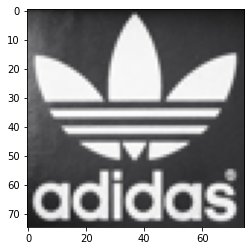

In [ ]:
plt.imshow(img_data[-300])

In [ ]:
len(label_data)

400

In [ ]:
data = os.listdir("/content/drive/MyDrive/flickr_logos/flickr_47_dataset/FlickrLogos_47/logo_data")
for folder in data: 
  PTF = "/content/drive/MyDrive/flickr_logos/flickr_47_dataset/FlickrLogos_47/logo_data/"+folder+"/"
  for image in tqdm.tqdm(os.listdir(PTF)):
        if image.endswith('.png') and image.find('mask') is -1:
            image_bbd = image.replace('png', 'gt_data.txt')
            f = open(PTF + image_bbd)
            for line in f:
                line = line.strip().split()
                # coordinates
                if num_to_label[int(line[4])] in target:
                    x = int(line[0])
                    y = int(line[1])
                    w = int(line[2])
                    h = int(line[3])
                    img = Image.fromarray(skimage.io.imread(PTF + image)).crop((x, y, w, h)).resize(resize_dim)
                    img = np.array(img)
                    img = img_data.append(img)
                    label = num_to_label[int(line[4])]
                    label_data.append(label.lower())

100%|██████████| 366/366 [00:18<00:00, 19.77it/s]


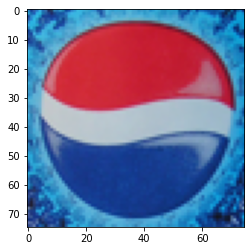

In [ ]:
plt.imshow(img_data[-7])

In [ ]:
len(img_data)

1102

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
label_encoded = label_encode.fit_transform(label_data)

In [ ]:
print(len(set(label_encoded)))

5


In [ ]:
img_data = np.array(img_data)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(img_data,label_encoded,test_size=0.10,shuffle=True)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(991, 75, 75, 3)
(111, 75, 75, 3)
(991,)
(111,)


In [ ]:
X_train[0].shape

(75, 75, 3)

In [ ]:
#final_layer_output = len(set(label_encoded))
#input_shape = X_train[0].shape

In [ ]:
from keras.applications.vgg16 import VGG16
vgg16 = VGG16(weights='imagenet',include_top = False,input_shape=(75,75,3))
for layer in vgg16.layers:
  layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# from keras.applications.inception_resnet_v2 import InceptionResNetV2
# incep = InceptionResNetV2(weights='imagenet',include_top = False,input_shape=(75,75,3))
# for layer in incep.layers:
#   layer.trainable = False

219070464/219055592 [==============================] - 2s 0us/step


In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 18, 128)       0     

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [ ]:
model_1 = Sequential()
model_1.add(vgg16)
model_1.add(Flatten())
model_1.add(Dense(2048,activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(1024,activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(512,activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(256,activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(128,activation='relu'))
model_1.add(Dense(5,activation='softmax'))

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_4 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)              

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255,
                            rotation_range=60,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.4,
                            zoom_range=0.4,
                            horizontal_flip=True,
                            vertical_flip=True,
                            fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
model_1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
batch_size = 32
epochs = 10

history = model_1.fit_generator(datagen.flow(X_train,y_train),
                              validation_data=valid_datagen.flow(X_val,y_val),
                              epochs=epochs,
                              steps_per_epoch=100,
                              validation_steps=100,
                              use_multiprocessing=True)

In [ ]:
r = history.history

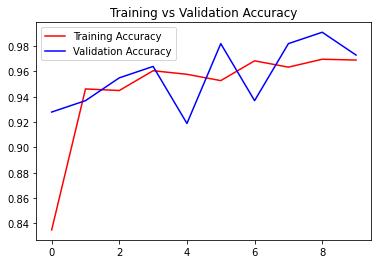

In [ ]:
plt.plot(r['acc'],'r',label = 'Training Accuracy')
plt.plot(r['val_acc'],'b',label = 'Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

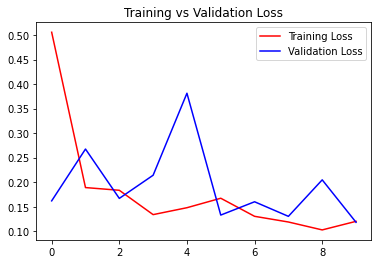

In [ ]:
plt.plot(r['loss'],'r',label = 'Training Loss')
plt.plot(r['val_loss'],'b',label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [ ]:
test_set = X_val[:30] / 255
test_res = model_1.predict_proba(test_set)
for pred,truth in zip(test_res,y_val):
    print(label_encode.inverse_transform([truth]),'===>',label_encode.inverse_transform([np.argmax(pred,axis=0)]),pred.max(),np.argmax(pred,axis=0))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


['bmw'] ===> ['bmw'] 1.0 2
['cocacola'] ===> ['cocacola'] 0.9999963 3
['pepsi_symbol'] ===> ['pepsi_symbol'] 0.9999999 4
['adidas'] ===> ['adidas'] 1.0 0
['adidas'] ===> ['adidas'] 0.98957247 0
['adidas'] ===> ['adidas'] 1.0 0
['adidas'] ===> ['adidas'] 1.0 0
['cocacola'] ===> ['cocacola'] 0.9999958 3
['apple'] ===> ['apple'] 1.0 1
['cocacola'] ===> ['cocacola'] 0.99859065 3
['pepsi_symbol'] ===> ['pepsi_symbol'] 1.0 4
['adidas'] ===> ['adidas'] 0.9999999 0
['bmw'] ===> ['bmw'] 1.0 2
['adidas'] ===> ['adidas'] 0.9895438 0
['pepsi_symbol'] ===> ['pepsi_symbol'] 1.0 4
['bmw'] ===> ['bmw'] 0.9999989 2
['bmw'] ===> ['bmw'] 1.0 2
['apple'] ===> ['apple'] 0.8795146 1
['bmw'] ===> ['bmw'] 1.0 2
['cocacola'] ===> ['cocacola'] 0.99999475 3
['bmw'] ===> ['bmw'] 0.99998915 2
['pepsi_symbol'] ===> ['pepsi_symbol'] 0.99841523 4
['cocacola'] ===> ['cocacola'] 0.99999964 3
['bmw'] ===> ['bmw'] 1.0 2
['cocacola'] ===> ['cocacola'] 0.9998857 3
['apple'] ===> ['apple'] 1.0 1
['cocacola'] ===> ['cocacola

In [ ]:
model_json = model_1.to_json()
with open("/content/drive/MyDrive/new_model/architecture.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model_1.save_weights("/content/drive/MyDrive/new_model/weights.h5")

In [ ]:
model_1.save("/content/drive/MyDrive/new_model/logonet01.h5")
with open('/content/drive/MyDrive/new_model/logonet01.pickle', 'wb') as handle:
    pickle.dump(label_encode, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
from keras.models import load_model
import pickle

def load_k_model(model_dir):
    return load_model(model_dir)

def load_labelenc(pickle_dir):
    labenc = open(pickle_dir,'rb')
    labenc = pickle.load(labenc)
    return labenc

label_encode = load_labelenc("/content/drive/MyDrive/model/logonet01.pickle")
model_1 = load_k_model("/content/drive/MyDrive/model/logonet01.h5")

/usr/local/lib/python3.7/dist-packages/keras/layers/core.py:1041: UserWarning: keras.applications.inception_resnet_v2 is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


In [ ]:
!pip install selectivesearch

In [ ]:
import skimage.io
import selectivesearch
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [ ]:
from google.colab import files
files.upload()

Saving 7.jfif to 7.jfif


{'7.jfif': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x08\x07\x06\t\x08\x07\x08\n\n\t\x0b\r\x16\x0f\r\x0c\x0c\r\x1b\x14\x15\x10\x16 \x1d"" \x1d\x1f\x1f$(4,$&1\'\x1f\x1f-=-157:::#+?D?8C49:7\x01\n\n\n\r\x0c\r\x1a\x0f\x0f\x1a7%\x1f%77777777777777777777777777777777777777777777777777\xff\xc0\x00\x11\x08\x00\x9f\x00\x9f\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x04\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x08\x07\xff\xc4\x00E\x10\x00\x01\x03\x02\x04\x03\x05\x04\x05\t\x06\x07\x01\x00\x00\x00\x01\x00\x02\x03\x04\x11\x05\x12!1\x06AQ\x13"aq\x81\x07\x142\x91#r\xa1\xb1\xb2\x15BRSbs\x82\x92\xc1356Ct\xe1%DTcd\xd1\xf0$\xff\xc4\x00\x1a\x01\x01\x00\x02\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x01\x04\x05\x06\xff\xc4\x006\x11\x00\x02\x01\x02\x03\x04\x08\x04\x06\x02\x03\x00\x00\x00\x00\x00\x00\x01\x02\x03\x11\x04!1\x12AQq\x05\x132a\x81\x91\xb1\xf0"4\xa1\xd1\x14

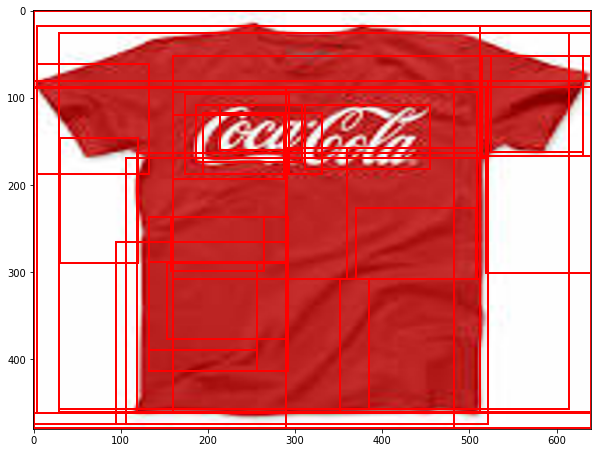

In [ ]:
ss_arr = []

img = Image.open('/content/7.jfif').resize((640,480))
img = np.array(img)

img_lbl, regions = selectivesearch.selective_search(img, scale=500, sigma=0, min_size=500)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))

candidates = []

for r in regions:
    # excluding same rectangle (with different segments)
    if r['rect'] in candidates:
        continue
    # excluding regions smaller than 2000 pixels
    if r['size'] < 2000:
        continue
    # distorted rects
    x, y, w, h = r['rect']
    if h is 0 or w is 0:
        continue
    if w / h > 2 or h / w > 2:
        continue
    candidates.append(r['rect'])
        
    rect = mpatches.Rectangle((x,y), w, h, fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    image = Image.fromarray(img).crop((x,y,x+w,h+y)).resize(resize_dim)
    ss_arr.append(np.array(image))

ax.imshow(img)
ss_arr = np.array(ss_arr) / 255

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


cocacola ===> 0.9999999


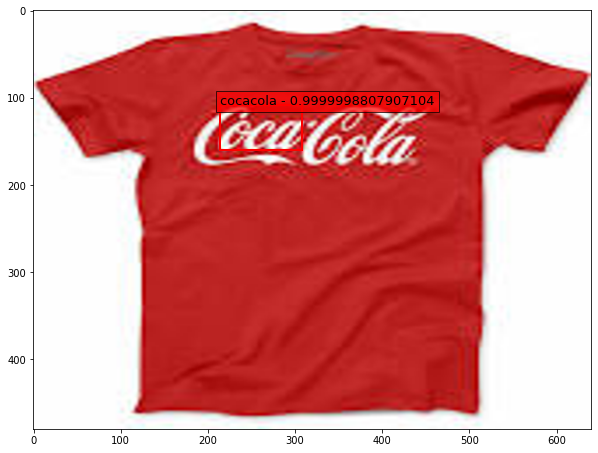

In [ ]:
preds = []
probs = []


fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
pred = model_1.predict_proba(ss_arr)


for j,i in zip(pred,range(len(pred))):
    preds.append(label_encode.inverse_transform([np.argmax(j,axis=0)])[0])
    probs.append(j.max())



x,y,w,h = candidates[probs.index(max(probs))]
rect = mpatches.Rectangle((x,y), w, h, fill=False, edgecolor='red', linewidth=2)  
ax.add_patch(rect)
ax.text(x,y,"{} - {}".format(preds[probs.index(max(probs))], max(probs)),fontsize=13,bbox=dict(facecolor='red', alpha=0.7))

ax.imshow(img)
print(preds[probs.index(max(probs))],'===>',max(probs))

In [ ]:
from tensorflow.keras.models import model_from_json

In [ ]:
json_file = open('/content/drive/MyDrive/new_model/architecture.json', 'r')
loaded_model_json = json_file.read()
loaded_model_1 = model_from_json(loaded_model_json)
# load weights into new model
loaded_model_1.load_weights("/content/drive/MyDrive/new_model/weights.h5")

In [ ]:
loaded_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
test_set = X_val[:10] / 255
test_res = loaded_model_1.predict_proba(test_set)
for pred,truth in zip(test_res,y_val):
    print(label_encode.inverse_transform([truth]),'===>',label_encode.inverse_transform([np.argmax(pred,axis=0)]),pred.max(),np.argmax(pred,axis=0))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


['bmw'] ===> ['bmw'] 1.0 2
['bmw'] ===> ['bmw'] 0.9932132 2
['apple'] ===> ['apple'] 1.0 1
['cocacola'] ===> ['cocacola'] 0.99992204 3
['apple'] ===> ['apple'] 1.0 1
['cocacola'] ===> ['cocacola'] 0.99999547 3
['pepsi_symbol'] ===> ['pepsi_symbol'] 0.99908984 4
['adidas'] ===> ['adidas'] 1.0 0
['apple'] ===> ['apple'] 1.0 1
['cocacola'] ===> ['cocacola'] 0.9999999 3
